# Iris Flower prediction using machine learning

In [1]:
# load data to program
import pandas as pd
column = ['sl' , 'sw' , 'pl' , 'pw' , 'target']
iris = pd.read_csv("C:/random/iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Convert the target to numeric

In [2]:
#Label encoding for target
#Assign numeric value according to alphabetic order
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris.Species = le.fit_transform(iris.Species)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Divide data into input and output

In [3]:
iris = iris.drop('Id', axis=1)

X = iris.iloc[:,:4]
Y = iris.iloc[:,4:]
X.head()
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [4]:
X = X.values
Y = Y.values
Y = Y.ravel()
Y.shape

(150,)

# Divide data for training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size=0.262 , random_state=7)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110, 4)
(40, 4)
(110,)
(40,)


# KNN

In [6]:
#create a model for KNN
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
K = KNeighborsClassifier(n_neighbors=5)

#train the model
K.fit(X_train , Y_train)

#test the model
Y_pred_knn = K.predict(X_test)
print(Y_pred_knn)

#Find accuracy
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(Y_test , Y_pred_knn)
acc_knn = round(acc_knn*100,2)
print("Accuracy in KNN is : ", acc_knn ,'%')

#predict for an unknown flower
K.predict([[6.6,2.4,5,1.9]])


[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 1 2 2 0 0 1 2 1 1 2 1 1 1 2 2 2 1 0 2 1 0 0
 0 0 2]
Accuracy in KNN is :  90.0 %


array([2])

# Logistic Regression

In [7]:
#create a model for LR
from sklearn.linear_model import LogisticRegression
L = LogisticRegression(solver = 'liblinear' , multi_class = 'auto')
L.fit(X_train , Y_train)
Y_pred_lg = L.predict(X_test)
acc_lg = accuracy_score(Y_test , Y_pred_lg)
acc_lg = round(acc_lg*100,2)
print("Accuracy in Logistic Regression is : ", acc_lg ,'%')
#predict for an unknown flower
L.predict([[5.2,2,4.6,1]])


Accuracy in Logistic Regression is :  87.5 %


array([1])

# Decision Tree

In [8]:
#create a model for DR
from sklearn.tree import DecisionTreeClassifier
#create  object
D = DecisionTreeClassifier()
#train the model
D.fit(X_train , Y_train)
#test the model
Y_pred_dt = D.predict(X_test)
#find accuracy
acc_dt = accuracy_score(Y_test , Y_pred_dt)
acc_dt = round(acc_dt*100,2)
print("Accuracy in Decision Tree is : ", acc_dt , '%')
#predict for unknown flower
L.predict([[5,2,4,1]])

Accuracy in Decision Tree is :  90.0 %


array([1])

# Naive Bayes

In [9]:
#create a model for NB
from sklearn.naive_bayes import GaussianNB
#create object
N = GaussianNB()
#train the model
N.fit(X_train , Y_train)
#test the model
Y_pred_nb = N.predict(X_test)
#find accuracy
acc_nb = accuracy_score(Y_test , Y_pred_nb)
acc_nb = round(acc_nb*100,2)
print("Accuracy in Naive Bayes is : ", acc_nb , '%')
#predict for unknown number
L.predict([[5,3,6,2]])

Accuracy in Naive Bayes is :  87.5 %


array([2])

# Support Vector Machine

In [10]:
#create a model for SVM
#SVC is support vector classifier
from sklearn.svm import SVC
S = SVC(kernel = 'linear')
#train the model
S.fit(X_train , Y_train)
#test the model
Y_pred_svm = S.predict(X_test)
#find accuracy
acc_svm = accuracy_score(Y_test , Y_pred_svm)
acc_svm = round(acc_svm*100,2)
print("Accuracy in svm is : ", acc_svm , '%')

Accuracy in svm is :  97.5 %


# Random Forest

In [11]:
#implement Random Forest
from sklearn.ensemble import RandomForestClassifier

#create the model with 100 trees
R = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')

#train the model
R.fit(X_train , Y_train)
#test the model
Y_pred_rf = R.predict(X_test)
#find accuracy
acc_rf = accuracy_score(Y_test , Y_pred_rf)
acc_rf = round(acc_rf*100,2)
print("Accuracy in random forest is : ", acc_rf , '%')

Accuracy in random forest is :  90.0 %


# Represent accuracy of all models graphically

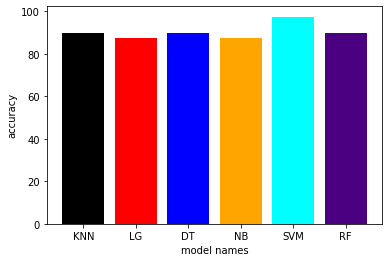

In [12]:
#create a graphical representation
import matplotlib.pyplot as plt
%matplotlib inline
model = ['KNN' , 'LG' , 'DT' , 'NB' , 'SVM' , 'RF']
accuracy = [acc_knn , acc_lg , acc_dt , acc_nb , acc_svm , acc_rf]
plt.xlabel("model names")
plt.ylabel('accuracy')
plt.bar(model,accuracy,color = ['black' , 'red' , 'blue' , 'orange' , 'cyan' , 'indigo'])
plt.show()